# [K-means Clustering in Python](http://benalexkeen.com/k-means-clustering-in-python/)

## [K-means聚类 的 Python 实现【图文解释】](https://zhuanlan.zhihu.com/p/32017151?group_id=924673211032432640)

K-means clustering is a clustering algorithm that aims to partition 

K-means聚类是一个聚类算法用来将n个点分成k个集群。

算法有3步：

1. 初始化– K 个初始质心会被随机生成
    - Initialisation – K initial “means” (centroids) are generated at random
2. 分配 – K 集群通过点关联到最近的初始质心生成
    - Assignment – K clusters are created by associating each observation with the nearest centroid
3. 更新 –重新计算k个集群对应的质心
    - Update – The centroid of the clusters becomes the new mean

Assignment and Update are repeated iteratively until convergence.The end result is that the sum of squared errors is minimised between points and their respective centroids.

分配和更新会一直重复执行直到质心不再发生变化。最后的结果是点和质心之间的均方差达到最小。

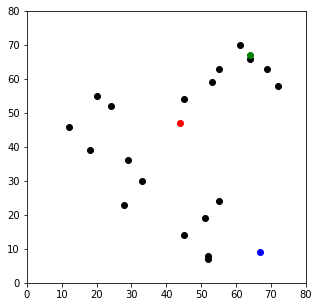

In [1]:
## Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

## 可选，随机数生成：df = pd.DataFrame(np.random.randn(100,2)*80,columns=list('xy'))
df = pd.DataFrame({
    'x': [12, 20, 53, 55, 61, 64, 69, 72, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55],
    'y': [ 46, 55, 59, 63, 70, 66, 63, 58, 23, 39, 36, 30, 52, 54,14, 8, 19, 7, 24]
})

k = 3 #以 k=3 为例演示这个过程:
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  46        32.015621        56.080300        66.287254        1     r
1  20  55        25.298221        45.607017        65.764732        1     r
2  53  59        15.000000        13.601471        51.923020        2     g
3  55  63        19.416488         9.848858        55.317267        2     g
4  61  70        28.600699         4.242641        61.294372        2     g


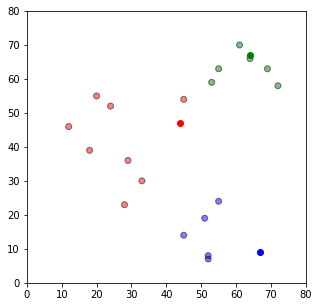

In [2]:
## Assignment Stage 分配

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

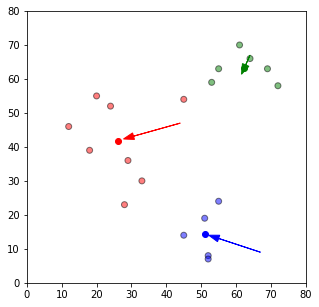

In [3]:
## Update Stage 更新

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

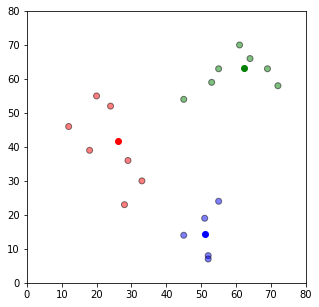

In [4]:
## Repeat Assigment Stage 重新分配

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

可以看到一个红色的点，变成了绿色的；一个蓝色的点变成了红色的。

Note that one of the reds is now green and one of the blues is now red.

我们更加接近最终目标了。

We are getting closer.

现在重复这个过程，直到每一个集群都没有变化为止。

We now repeat until there are no changes to any of the clusters.

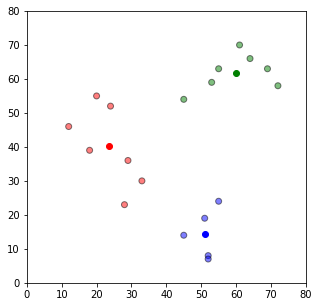

In [5]:
# Continue until all assigned categories don't change any more 继续这个过程
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

现在得到3个清晰地集群和3个质点在这三个集群的中间。



结论：

1.k-means 可以尝试不同的初始化质点来获取更好的 label.

2.如果数据集有一定的对称性，一些数据可能会被错误的标记。

3.k-means 依赖欧氏距离，所以对尺度非常敏感，所以如果存在缩放问题，要对数据进行归一化处理。

让我们用scikit-learn再做一遍 by yao

In [6]:
df = pd.DataFrame({
    'x': [12, 20, 53, 55, 61, 64, 69, 72, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55],
    'y': [ 46, 55, 59, 63, 70, 66, 63, 58, 23, 39, 36, 30, 52, 54,14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colors = list(map(lambda x: colmap[x+1], labels))

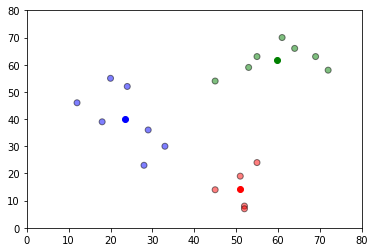

In [8]:
plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

搞定